![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)
# 基础课第一部分（python）第七次作业

各位同学大家好！今天课上演示爬虫的原理，我们来回顾一下爬虫的思路，进行爬虫练习。
爬虫是一个程序，这个程序可以获得网页数据。
## 爬虫的思路
- 1.首先确定需要爬取的网URL地址   
[空气质量指数(http://www.tianqihoubao.com/aqi/)](http://www.tianqihoubao.com/aqi/)    


- 2.通过HTTP/HTTPS协议来获取对应的HTML页面  


- 3.提取HTML页面内有用的数据：
- a. 如果是需要的数据--保存
- b. 如果有其他URL，继续执行第二步

## 爬虫练习 
爬虫项目整体代码：  
[高民权_中国城市空气质量数据抓取_Github](https://github.com/fortyMiles/ChineseAirConditionCrawler)  
【没有头绪的指令】Github中的`get_location_info.py`文件对应city_coding的生成  

**处理城市编码**  
将`<div class="citychk">`copy下来，进一步处理，生成 city_coding  

In [2]:
# 请大家尽量尝试自己从网页中搜寻并copy，而不是直接从课件copy
import re
html="""<div class="citychk">
                        <dl>
                            <dt><b style="color:Red">热门城市</b></dt>
							<dd><a href="/aqi/beijing.html">北京 </a> <a href="/aqi/tianjin.html">天津 </a>
                             <a href="/aqi/shanghai.html">上海 </a> <a href="/aqi/chongqing.html">重庆 </a><a href="/aqi/guangzhou.html">广州 </a><a href="/aqi/shenzhen.html">深圳 </a><a href="/aqi/hangzhou.html">杭州 </a> <a href="/aqi/chengdu.html">成都 </a> &nbsp;&nbsp;<a href="/aqi/aqi_rank.html" target="_blank"><span class="aqi-lv4"><b>全国空气质量排名</b></span></a>
                            </dd>
                        </dl>

                        <dl>
                            <dt><b>河北</b></dt><dd><a href="/aqi/shijiazhuang.html">石家庄 </a><a href="/aqi/tangshan.html">唐山 </a>
                                <a href="/aqi/qinhuangdao.html">秦皇岛 </a><a href="/aqi/baoding.html">保定 </a><a href="/aqi/zhangjiakou.html">张家口 </a>
                                <a href="/aqi/handan.html">邯郸 </a><a href="/aqi/xingtai.html">邢台 </a><a href="/aqi/chengde.html">承德 </a>
                                <a href="/aqi/cangzhou.html">沧州 </a><a href="/aqi/langfang.html">廊坊 </a><a href="/aqi/hengshui.html">衡水 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>山西</b></dt><dd><a href="/aqi/taiyuan.html">太原 </a><a href="/aqi/datong.html">大同 </a> <a href="/aqi/yangquan.html">阳泉 </a><a href="/aqi/changzhi.html">长治 </a> <a href="/aqi/linfen.html">临汾 </a>
                             <a href="/aqi/jincheng.html">晋城 </a>  <a href="/aqi/shuozhou.html">朔州 </a>  <a href="/aqi/sxyuncheng.html">运城 </a>  <a href="/aqi/xinzhou.html">忻州 </a>  <a href="/aqi/lvliang.html">吕梁 </a> <a href="/aqi/jinzhong.html">晋中 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>内蒙古</b></dt><dd><a href="/aqi/huhehaote.html">呼和浩特 </a><a href="/aqi/baotou.html">包头 </a><a href="/aqi/eerduosi.html">鄂尔多斯 </a>
                                <a href="/aqi/wuhai.html">乌海 </a>  <a href="/aqi/chifeng.html">赤峰 </a>  <a href="/aqi/tongliao.html">通辽 </a>	<a href="/aqi/bayannaoer.html">巴彦淖尔 </a><wbr>	<a href="/aqi/xinganmeng.html">兴安盟 </a>	<a href="/aqi/alashanmeng.html">阿拉善盟 </a>	<a href="/aqi/hulunbeier.html">呼伦贝尔 </a>	<a href="/aqi/erlianhaote.html">二连浩特 </a>	<a href="/aqi/xilinguole.html">锡林郭勒 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>辽宁</b></dt><dd><a href="/aqi/shenyang.html">沈阳 </a><a href="/aqi/dalian.html">大连 </a><a href="/aqi/dandong.html">丹东 </a><a href="/aqi/yingkou.html">营口 </a><a href="/aqi/panjin.html">盘锦 </a><a href="/aqi/huludao.html">葫芦岛 </a>  <a href="/aqi/anshan.html">鞍山 </a>   <a href="/aqi/jinzhou.html">锦州 </a><a href="/aqi/benxi.html">本溪 </a>	<a href="/aqi/wafangdian.html">瓦房店 </a><wbr>	<a href="/aqi/fushun.html">抚顺 </a>	<a href="/aqi/liaoyang.html">辽阳 </a>	<a href="/aqi/fuxin.html">阜新 </a>	<a href="/aqi/chaoyang.html">朝阳 </a>	<a href="/aqi/tieling.html">铁岭 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>吉林</b></dt><dd><a href="/aqi/changchun.html">长春 </a> <a href="/aqi/jilin.html">吉林 </a> <a href="/aqi/siping.html">四平 </a> <a href="/aqi/liaoyuan.html">辽源 </a> <a href="/aqi/baishan.html">白山 </a> <a href="/aqi/songyuan.html">松原 </a> <a href="/aqi/baicheng.html">白城 </a> <a href="/aqi/yanbian.html">延边 </a> <a href="/aqi/tonghua.html">通化 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>黑龙江</b></dt><dd><a href="/aqi/haerbin.html">哈尔滨 </a> <a href="/aqi/qiqihaer.html">齐齐哈尔 </a> <a href="/aqi/jixi.html">鸡西 </a> <a href="/aqi/hegang.html">鹤岗 </a> <a href="/aqi/shuangyashan.html">双鸭山 </a> <a href="/aqi/daqing.html">大庆 </a> <a href="/aqi/jiamusi.html">佳木斯 </a> <a href="/aqi/qitaihe.html">七台河 </a><wbr>  <a href="/aqi/mudanjiang.html">牡丹江 </a> <a href="/aqi/heihe.html">黑河 </a> <a href="/aqi/suihua.html">绥化 </a> <a href="/aqi/daxinganling.html">大兴安岭 </a> <a href="/aqi/yichun.html">伊春 </a> <a href="/aqi/hljgannan.html">甘南 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>江苏</b></dt><dd><a href="/aqi/nanjing.html">南京 </a><a href="/aqi/wuxi.html">无锡 </a><a href="/aqi/xuzhou.html">徐州 </a><a href="/aqi/changzhou.html">常州 </a>
                                <a href="/aqi/suzhou.html">苏州 </a><a href="/aqi/nantong.html">南通 </a><a href="/aqi/lianyungang.html">连云港 </a>
                                <a href="/aqi/huaian.html">淮安 </a><a href="/aqi/yancheng.html">盐城 </a><a href="/aqi/yangzhou.html">扬州 </a>
                                <a href="/aqi/zhenjiang.html">镇江 </a>  <a href="/aqi/jstaizhou.html">泰州 </a>  <a href="/aqi/suqian.html">宿迁 </a><wbr>
								 <a href="/aqi/kunshan.html">昆山 </a> <a href="/aqi/haimen.html">海门 </a> <a href="/aqi/taicang.html">太仓 </a> <a href="/aqi/jiangyin.html">江阴 </a> <a href="/aqi/liyang.html">溧阳 </a> <a href="/aqi/jintan.html">金坛 </a> <a href="/aqi/yixing.html">宜兴 </a><a href="/aqi/jurong.html">句容 </a><a href="/aqi/changshu.html">常熟 </a><a href="/aqi/wujiang.html">吴江 </a><a href="/aqi/zhangjiagang.html">张家港 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>浙江</b></dt><dd><a href="/aqi/hangzhou.html">杭州 </a><a href="/aqi/ningbo.html">宁波 </a><a href="/aqi/wenzhou.html">温州 </a><a href="/aqi/jiaxing.html">嘉兴 </a>
                                <a href="/aqi/huzhou.html">湖州 </a><a href="/aqi/jinhua.html">金华 </a><a href="/aqi/quzhou.html">衢州 </a>
                                <a href="/aqi/zhoushan.html">舟山 </a><a href="/aqi/taizhou.html">台州 </a><a href="/aqi/lishui.html">丽水 </a><a href="/aqi/shaoxing.html">绍兴 </a><a href="/aqi/yiwu.html">义乌 </a><a href="/aqi/zjfuyang.html">富阳 </a><a href="/aqi/linan.html">临安 </a>
                                
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>安徽</b></dt><dd><a href="/aqi/hefei.html">合肥 </a> <a href="/aqi/wuhu.html">芜湖 </a> <a href="/aqi/bangbu.html">蚌埠 </a> <a href="/aqi/huainan.html">淮南 </a> <a href="/aqi/maanshan.html">马鞍山 </a> <a href="/aqi/huaibei.html">淮北 </a> <a href="/aqi/tongling.html">铜陵 </a> <a href="/aqi/anqing.html">安庆 </a> <a href="/aqi/huangshan.html">黄山 </a> <a href="/aqi/chuzhou.html">滁州 </a> <a href="/aqi/fuyang.html">阜阳 </a> <a href="/aqi/anhuisuzhou.html">宿州 </a> <wbr><a href="/aqi/chaohu.html">巢湖 </a> <a href="/aqi/liuan.html">六安 </a> <a href="/aqi/bozhou.html">亳州 </a> <a href="/aqi/chizhou.html">池州 </a> <a href="/aqi/xuancheng.html">宣城 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>福建</b></dt><dd><a href="/aqi/fujianfuzhou.html">福州 </a><a href="/aqi/xiamen.html">厦门 </a><a href="/aqi/quanzhou.html">泉州 </a>
                            <a href="/aqi/putian.html">莆田 </a> <a href="/aqi/sanming.html">三明 </a> <a href="/aqi/zhangzhou.html">漳州 </a> <a href="/aqi/nanping.html">南平 </a> <a href="/aqi/longyan.html">龙岩 </a> <a href="/aqi/ningde.html">宁德 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>江西</b></dt><dd><a href="/aqi/nanchang.html">南昌 </a> <a href="/aqi/jingdezhen.html">景德镇 </a> <a href="/aqi/pingxiang.html">萍乡 </a> <a href="/aqi/xinyu.html">新余 </a> <a href="/aqi/yingtan.html">鹰潭 </a> <a href="/aqi/ganzhou.html">赣州 </a> <a href="/aqi/jxyichun.html">宜春 </a> <a href="/aqi/fuzhou.html">抚州 </a> <a href="/aqi/jiujiang.html">九江 </a> <a href="/aqi/shangrao.html">上饶 </a> <a href="/aqi/jian.html">吉安 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>山东</b></dt><dd><a href="/aqi/jinan.html">济南 </a><a href="/aqi/qingdao.html">青岛 </a><a href="/aqi/zibo.html">淄博 </a>
                            <a href="/aqi/zaozhuang.html">枣庄 </a><a href="/aqi/dongying.html">东营 </a><a href="/aqi/yantai.html">烟台 </a><a href="/aqi/weifang.html">潍坊 </a><a href="/aqi/sdjining.html">济宁 </a>
                                <a href="/aqi/taian.html">泰安 </a><a href="/aqi/weihai.html">威海 </a><a href="/aqi/rizhao.html">日照 </a>
								<a href="/aqi/laiwu.html">莱芜 </a>  <a href="/aqi/linyi.html">临沂 </a> 
                                <wbr> <a href="/aqi/dezhou.html">德州 </a>  <a href="/aqi/liaocheng.html">聊城 </a>  <a href="/aqi/binzhou.html">滨州 </a> 
								<a href="/aqi/heze.html">菏泽 </a><a href="/aqi/rushan.html">乳山 </a><a href="/aqi/sdrongcheng.html">荣成 </a>
								<a href="/aqi/wendeng.html">文登 </a><a href="/aqi/zhangqiu.html">章丘 </a><a href="/aqi/pingdu.html">平度 </a>
								<a href="/aqi/laizhou.html">莱州 </a><a href="/aqi/sdzhaoyuan.html">招远 </a><wbr><a href="/aqi/laixi.html">莱西 </a>
								<a href="/aqi/jiaozhou.html">胶州 </a><a href="/aqi/penglai.html">蓬莱 </a><a href="/aqi/jiaonan.html">胶南 </a>
								<a href="/aqi/shouguang.html">寿光 </a><a href="/aqi/jimo.html">即墨 </a>
                            </dd>
	
                        </dl>
                        <dl>
                            <dt><b>河南</b></dt><dd><a href="/aqi/zhengzhou.html">郑州 </a> <a href="/aqi/lvyang.html">洛阳 </a> <a href="/aqi/pingdingshan.html">平顶山 </a> <a href="/aqi/hebi.html">鹤壁 </a> <a href="/aqi/jiaozuo.html">焦作 </a> <a href="/aqi/luohe.html">漯河 </a> <a href="/aqi/sanmenxia.html">三门峡 </a> <a href="/aqi/nanyang.html">南阳 </a> <a href="/aqi/shangqiu.html">商丘 </a> <a href="/aqi/xinyang.html">信阳 </a> <a href="/aqi/zhoukou.html">周口 </a> <a href="/aqi/zhumadian.html">驻马店 </a> <wbr><a href="/aqi/anyang.html">安阳 </a><a href="/aqi/kaifeng.html">开封 </a><a href="/aqi/puyang.html">濮阳 </a><a href="/aqi/xuchang.html">许昌 </a><a href="/aqi/xinxiang.html">新乡  </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>湖北</b></dt><dd><a href="/aqi/wuhan.html">武汉 </a> <a href="/aqi/shiyan.html">十堰 </a> <a href="/aqi/yichang.html">宜昌 </a> <a href="/aqi/ezhou.html">鄂州 </a> <a href="/aqi/jingmen.html">荆门 </a> <a href="/aqi/xiaogan.html">孝感 </a> <a href="/aqi/huanggang.html">黄冈 </a> <a href="/aqi/xianning.html">咸宁 </a> <a href="/aqi/huangshi.html">黄石 </a>  <a href="/aqi/enshi.html">恩施 </a>  <a href="/aqi/xiangyang.html">襄阳 </a>   <a href="/aqi/suizhou.html">随州 </a> <a href="/aqi/jingzhou.html">荆州 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>湖南</b></dt><dd><a href="/aqi/changsha.html">长沙 </a><a href="/aqi/zhuzhou.html">株洲 </a>
                                <a href="/aqi/xiangtan.html">湘潭 </a> <a href="/aqi/changde.html">常德 </a> <a href="/aqi/zhangjiajie.html">张家界 </a> <a href="/aqi/yiyang.html">益阳 </a> <a href="/aqi/chenzhou.html">郴州 </a> <a href="/aqi/yongzhou.html">永州 </a> <a href="/aqi/huaihua.html">怀化 </a> <a href="/aqi/loudi.html">娄底 </a> <a href="/aqi/shaoyang.html">邵阳 </a> <a href="/aqi/yueyang.html">岳阳 </a> <a href="/aqi/xiangxi.html">湘西 </a> <a href="/aqi/hengyang.html">衡阳 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>广东</b></dt><dd><a href="/aqi/guangzhou.html">广州 </a><a href="/aqi/shaoguan.html">韶关 </a><a href="/aqi/shenzhen.html">深圳 </a><a href="/aqi/zhuhai.html">珠海 </a><a href="/aqi/shantou.html">汕头 </a>
                                <a href="/aqi/foshan.html">佛山 </a><a href="/aqi/jiangmen.html">江门 </a><a href="/aqi/zhaoqing.html">肇庆 </a>
                                <a href="/aqi/huizhou.html">惠州 </a> <a href="/aqi/heyuan.html">河源 </a> <a href="/aqi/gdqingyuan.html">清远 </a> 
                                <a href="/aqi/dongguang.html">东莞 </a> <a href="/aqi/zhongshan.html">中山 </a> 
                                <wbr><a href="/aqi/zhanjiang.html">湛江 </a> <a href="/aqi/maoming.html">茂名 </a>   <a href="/aqi/meizhou.html">梅州 </a> <a href="/aqi/shanwei.html">汕尾 </a>  <a href="/aqi/yangjiang.html">阳江 </a> <a href="/aqi/chaozhou.html">潮州 </a> <a href="/aqi/jieyang.html">揭阳 </a> <a href="/aqi/yunfu.html">云浮 </a> 
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>广西</b></dt><dd><a href="/aqi/nanning.html">南宁 </a><a href="/aqi/liuzhou.html">柳州 </a><a href="/aqi/beihai.html">北海 </a>
                            <a href="/aqi/guilin.html">桂林 </a> <a href="/aqi/wuzhou.html">梧州 </a> <a href="/aqi/fangchenggang.html">防城港 </a> <a href="/aqi/gxqinzhou.html">钦州 </a> <a href="/aqi/guigang.html">贵港 </a> <a href="/aqi/guangxiyulin.html">玉林 </a> <a href="/aqi/baise
.html">百色 </a> <a href="/aqi/hezhou.html">贺州 </a> <a href="/aqi/hechi.html">河池 </a> <a href="/aqi/laibin.html">来宾 </a> <a href="/aqi/chongzuo.html">崇左 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>海南</b></dt><dd><a href="/aqi/haikou.html">海口 </a> <a href="/aqi/sanya.html">三亚 </a>
                            </dd>
                        </dl>

                        <dl>
                            <dt><b>四川</b></dt><dd><a href="/aqi/chengdu.html">成都 </a> <a href="/aqi/zigong.html">自贡 </a> <a href="/aqi/panzhihua.html">攀枝花 </a> <a href="/aqi/luzhou.html">泸州 </a> <a href="/aqi/deyang.html">德阳 </a> <a href="/aqi/mianyang.html">绵阳 </a> <a href="/aqi/guangyuan.html">广元 </a> <a href="/aqi/scsuining.html">遂宁 </a> <a href="/aqi/leshan.html">乐山 </a> <a href="/aqi/nanchong.html">南充 </a> 
                                <a href="/aqi/meishan.html">眉山 </a><wbr>  <a href="/aqi/dazhou.html">达州 </a> <a href="/aqi/yaan.html">雅安 </a> <a href="/aqi/bazhong.html">巴中 </a> <a href="/aqi/ziyang.html">资阳 </a>
								<a href="/aqi/ganzi.html">甘孜 </a><a href="/aqi/neijiang.html">内江 </a><a href="/aqi/yibin.html">宜宾 </a>
								<a href="/aqi/guangan.html">广安 </a><a href="/aqi/aba.html">阿坝 </a><a href="/aqi/liangshan.html">凉山 </a>
	
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>贵州</b></dt><dd><a href="/aqi/guiyang.html">贵阳 </a> <a href="/aqi/liupanshui.html">六盘水 </a> <a href="/aqi/zunyi.html">遵义 </a> <a href="/aqi/anshun.html">安顺 </a> <a href="/aqi/bijie.html">毕节 </a> <a href="/aqi/tongren.html">铜仁 </a> <a href="/aqi/qianxinan.html">黔西南 </a> <a href="/aqi/qiannan.html">黔南 </a> <a href="/aqi/qiandongnan.html">黔东南 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>云南</b></dt><dd><a href="/aqi/kunming.html">昆明 </a><a href="/aqi/yuxi.html">玉溪 </a><a href="/aqi/baoshan.html">保山 </a> <a href="/aqi/zhaotong.html">昭通 </a> <a href="/aqi/lijiang.html">丽江 </a> 
                              <a href="/aqi/lincang.html">临沧 </a> <a href="/aqi/xishuangbanna.html">西双版纳 </a> <a href="/aqi/dehong.html">德宏 </a> <a href="/aqi/nujiang.html">怒江 </a><a href="/aqi/dali.html">大理 </a> <a href="/aqi/qujing.html">曲靖 </a> <wbr><a href="/aqi/chuxiong.html">楚雄 </a><a href="/aqi/honghe.html">红河 </a> <a href="/aqi/simao.html">思茅 </a><a href="/aqi/wenshan.html">文山 </a>
							  <a href="/aqi/puer.html">普洱 </a><a href="/aqi/diqing.html">迪庆 </a>
							  	
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>西藏</b></dt><dd><a href="/aqi/lasa.html">拉萨 </a>	<a href="/aqi/linzhi.html">林芝 </a><a href="/aqi/shannan.html">山南 </a><a href="/aqi/changdu.html">昌都 </a><a href="/aqi/rikaze.html">日喀则 </a><a href="/aqi/ali.html">阿里 </a><a href="/aqi/naqu.html">那曲 </a>
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>陕西</b></dt><dd><a href="/aqi/xian.html">西安 </a><a href="/aqi/tongchuan.html">铜川 </a>
                                <a href="/aqi/baoji.html">宝鸡 </a><a href="/aqi/xianyang.html">咸阳 </a><a href="/aqi/weinan.html">渭南 </a>
                                <a href="/aqi/yanan.html">延安 </a> <a href="/aqi/hanzhong.html">汉中 </a> <a href="/aqi/yulin.html">榆林 </a> <a href="/aqi/ankang.html">安康 </a> <a href="/aqi/shanglv.html">商洛 </a> 
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>甘肃</b></dt><dd><a href="/aqi/lanzhou.html">兰州 </a> <a href="/aqi/jiayuguan.html">嘉峪关 </a> <a href="/aqi/tianshui.html">天水 </a> <a href="/aqi/wuwei.html">武威 </a> <a href="/aqi/zhangye.html">张掖 </a> <a href="/aqi/pingliang.html">平凉 </a> <a href="/aqi/jiuquan.html">酒泉 </a> <a href="/aqi/gsqingyang.html">庆阳 </a>
                                 <a href="/aqi/dingxi.html">定西 </a> <a href="/aqi/gannan.html">甘南 </a> <a href="/aqi/linxia.html">临夏 </a><a href="/aqi/baiyin.html">白银 </a><a href="/aqi/jinchang.html">金昌 </a><a href="/aqi/longnan.html">陇南 </a>

                            </dd>
                        </dl>
                        <dl>
                            <dt><b>青海</b></dt><dd><a href="/aqi/xining.html">西宁 </a> <a href="/aqi/haidong.html">海东 </a> <a href="/aqi/guolv.html">果洛 </a>  <a href="/aqi/haibei.html">海北 </a> <a href="/aqi/hainan.html">海南 </a> <a href="/aqi/haixi.html">海西 </a> <a href="/aqi/yushu.html">玉树 </a>  <a href="/aqi/huangnan.html">黄南 </a> 
                            </dd>
                        </dl>
                        <dl>
                            <dt><b>宁夏</b></dt><dd><a href="/aqi/yinchuan.html">银川 </a> <a href="/aqi/shizuishan.html">石嘴山 </a> <a href="/aqi/wuzhong.html">吴忠 </a> <a href="/aqi/nxguyuan.html">固原 </a> <a href="/aqi/zhongwei.html">中卫 </a> 
                            </dd>
                        </dl>
                         <dl>
                            <dt><b>新疆</b></dt><dd><a href="/aqi/wulumuqi.html">乌鲁木齐 </a> <a href="/aqi/yili.html">伊犁哈萨克州 </a>  <a href="/aqi/kelamayi.html">克拉玛依 </a> <a href="/aqi/hami.html">哈密 </a><a href="/aqi/shihezi.html">石河子 </a><a href="/aqi/hetian.html">和田 </a><a href="/aqi/wujiaqu.html">五家渠 </a> <a href="/aqi/akesu.html">阿克苏 </a> <wbr><a href="/aqi/aletai.html">阿勒泰 </a> <a href="/aqi/kashi.html">喀什 </a> <a href="/aqi/kuerle.html">库尔勒 </a> <a href="/aqi/tulufan.html">吐鲁番 </a> <a href="/aqi/tacheng.html">塔城 </a>
							<a href="/aqi/xjbozhou.html">博州 </a><a href="/aqi/changji.html">昌吉 </a><a href="/aqi/kezhou.html">克州 </a>
                            </dd>
                        </dl>

                    </div>"""

"""
1、使用正则取出城市名称以及对应的拼音
2、将取出的城市名称及对应的拼音写入文件
"""
def get_city_html():
    city_coding1 = set()
    city_coding2 = []
    citys = re.findall('href="/aqi/\w*.html">.{0,5} ' ,html)
    for i in citys:
        e = i[11:-1]
        city=e.replace('.html">', "\t")
        city_coding1.add(city)
        city_coding2.append(city)
        file="city_coding"
        with open(file, "a") as f:
            f.write(city+"\n")
get_city_html()  #生成城市代码并写入文件

**首先安装包**  

``` bash
pip install bs4
```
参考：[Beautiful Soup 4.2.0 文档](https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html)

** 读取city_coding **

In [3]:
def get_city_coding(file='city_coding'):
    #your code
    city_dict = {}
    with open(file, "r") as f:
        city_d = f.readlines()
        for i in city_d:
            c,d=i.split("\t")
            city_dict[d.strip()]=c.strip()
    return city_dict


** 指定城市的URL地址确定 **
- 如何拼接成自己想要的URL地址？  
  如果是当前月份可以看到直接使用城市名称即可，如 http://www.tianqihoubao.com/aqi/hangzhou.html  
  如果查询的是历史月份，可以看到是这种格式 http://www.tianqihoubao.com/aqi/hangzhou-201702.html  
  http://www.tianqihoubao.com/lishi/beijing/month/202001.html

In [4]:
# def build_url(city_coding, year=None, month=None):#输入城市 年 月 输出 url地址
#     base = "http://www.tianqihoubao.com/aqi/"
#     url_city = base + "{}.html"
#     url_city_date = base + "{}-{}{}.html"
#     if year==None and month==None: 
#         return url_city.format(city_coding)
#     else:
#         month = "0" + str(month) if len(str(month)) < 2 else str(month) 
#         return url_city_date.format(city_coding, str(year), month)


In [5]:
def build_url(city_coding, year=None, month=None):
    base="http://www.tianqihoubao.com/lishi/"
    url= base + "{}/month/{}{}.html"
    month = "0" + str(month) if len(str(month)) < 2 else str(month)
    url_lishi = url.format(city_coding, str(year), month)
    return url_lishi

** HTTP 请求状态了解 **
- 200 - 请求成功
- 404 - 请求的资源（网页等）不存在
- 403 - 服务器理解请求客户端的请求，但是拒绝执行此请求     

** 模拟浏览器发送http请求 **
- get post

** 获得响应的数据 分析 保存**

In [6]:
import re
import os
import csv
import requests
from bs4 import BeautifulSoup

# 处理数据
def parse(url, city_name):
    response = requests.get(url)  #获取响应数据
    if response.ok:
        html = response.text
        soup = BeautifulSoup(html)  #使用bs4将响应数据按标准缩进输出
        data_table = soup.table
        content = data_table.contents[1:]   #去掉表头信息
        #print(content[::2])
        result = []   #定义一个列表，存入天气数据
        for index, ct in enumerate(content[::2]):  #隔一个字符串
            c = ct.text
            c1 = re.sub(" ","",c) #s使用正则替换掉空格
            c2 = re.sub("\r\n/\r\n|\r\n/","/",c1) #使用正则替换掉换行，由于数据中存在\r\n换行，要先确定一下数据中具体格式，直接输出看一下
            if index == 0:
                result.append(tuple(['城市'] + c2.split())) #添加表头信息
            else:
                result.append(tuple([city_name] + c2.split())) #添加天气数据
        return result
    else:
        return response.code

# 保存数据
def save_csv(file1, data):
    file = "{}.csv".format(file1)
    if os.path.exists(file):
        with open(file, 'a') as f:
            writer = csv.writer(f)
            writer.writerows(data[1:])  #写入多行数据
    else:
        with open(file, 'w') as f:
            writer = csv.writer(f)
            writer.writerows(data)


In [7]:
#绘制折线图

from matplotlib import pyplot
import matplotlib.pyplot as plt



#读取数据
def read_lishi_data(file_name):
    
    data_d = {}
    with open(file_name, "r") as f:
        data = f.readlines()
        for i in data[1:]:
            data_list = i.split(",")
            date_day = data_list[1]
            temperature = data_list[3]
            t = re.sub("℃", "", temperature)
            t1 = t.split("/")
            data_d[date_day] = t1
    return data_d

def drawing_temperature(file_name1, state):
    state_d = {0:"high",1:"low"}
    file_name = "{}.csv".format(file_name1)
    data_d = read_lishi_data(file_name)
    names = data_d
    names = [str(key) for key in list(names)]
    
    year = sorted(list(set([int(str(key)[:4]) for key in list(names)])))  #取出所有年份数据
    
    fig = plt.figure(figsize=(30, 10), dpi=80)  # 设置图片大小，和图片的dpi
    
    for e in range(len(year)):
        z = []
        y = []
        for key in list(names):
            k = re.findall(str(year[e])+".*", key)
            for i in k:
                z.append(k)
                x = range(len(z))
                y.append(int(data_d[i][state])) #取出对应年份气温数据
        plt.plot(x, y, label="{}year_{}_Temperature".format(year[e],state_d[state]))  # 添加折线
    plt.legend()  # 让图例生效
    plt.title("{}-{}".format(file_name1,state_d[state]))  # 表头名称
    plt.xlabel('Month')   # x轴标签
    plt.ylabel('Temperature') # y轴标签
    month_name = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    #month_name = [str(i)+"月" for i in range(1, 13)]
    plt.xticks(range(15, 365, 30), month_name, rotation=30)
    plt.savefig("{}-{}".format(file_name1,state_d[state])) ## 以矢量图保存，这样放大不会失真，不会模糊
    #plt.show()


北京


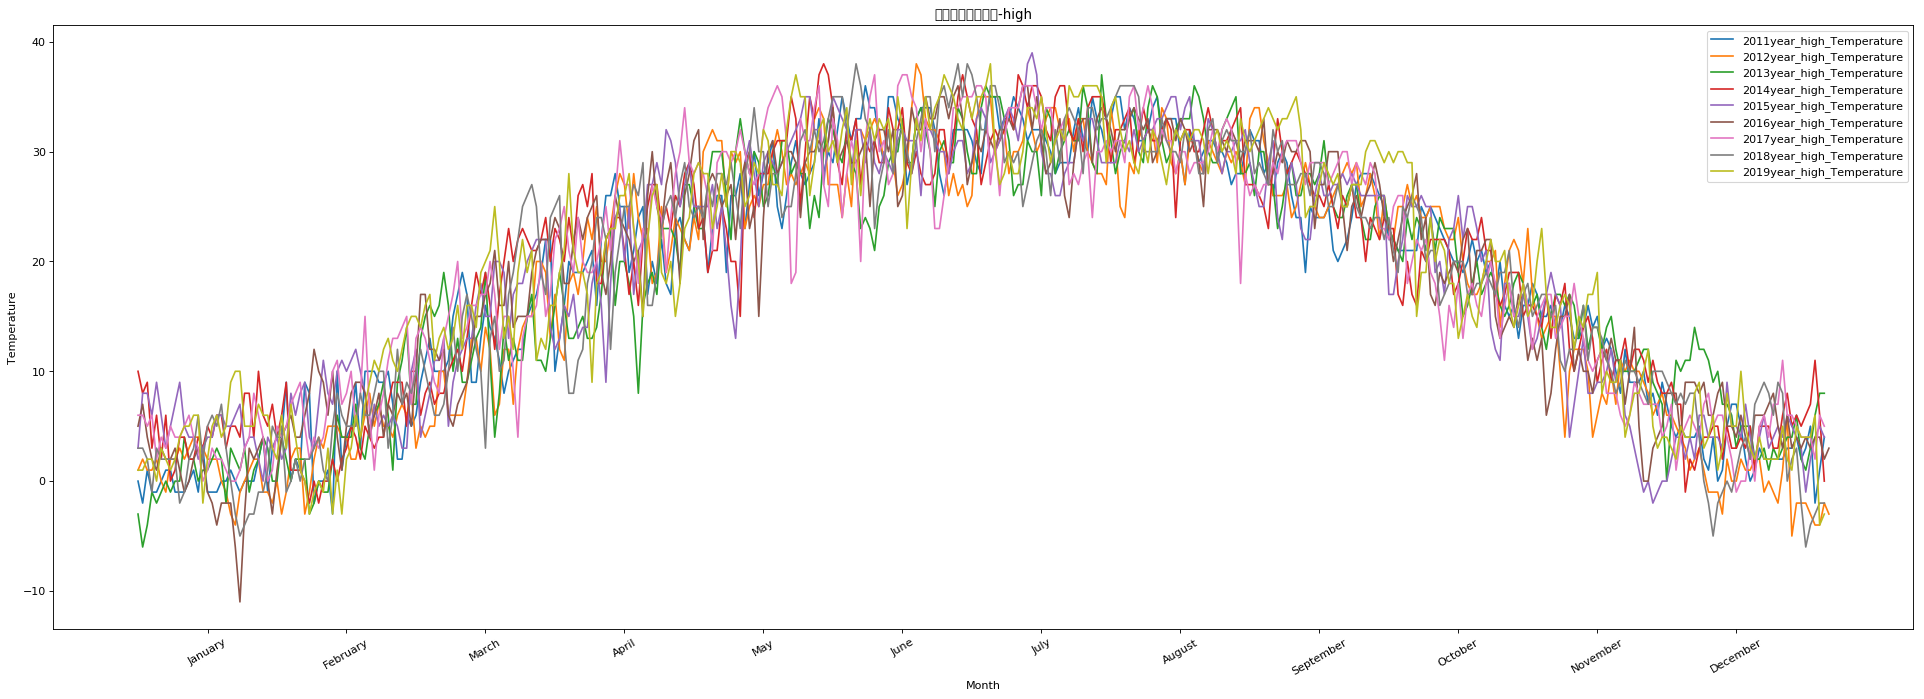

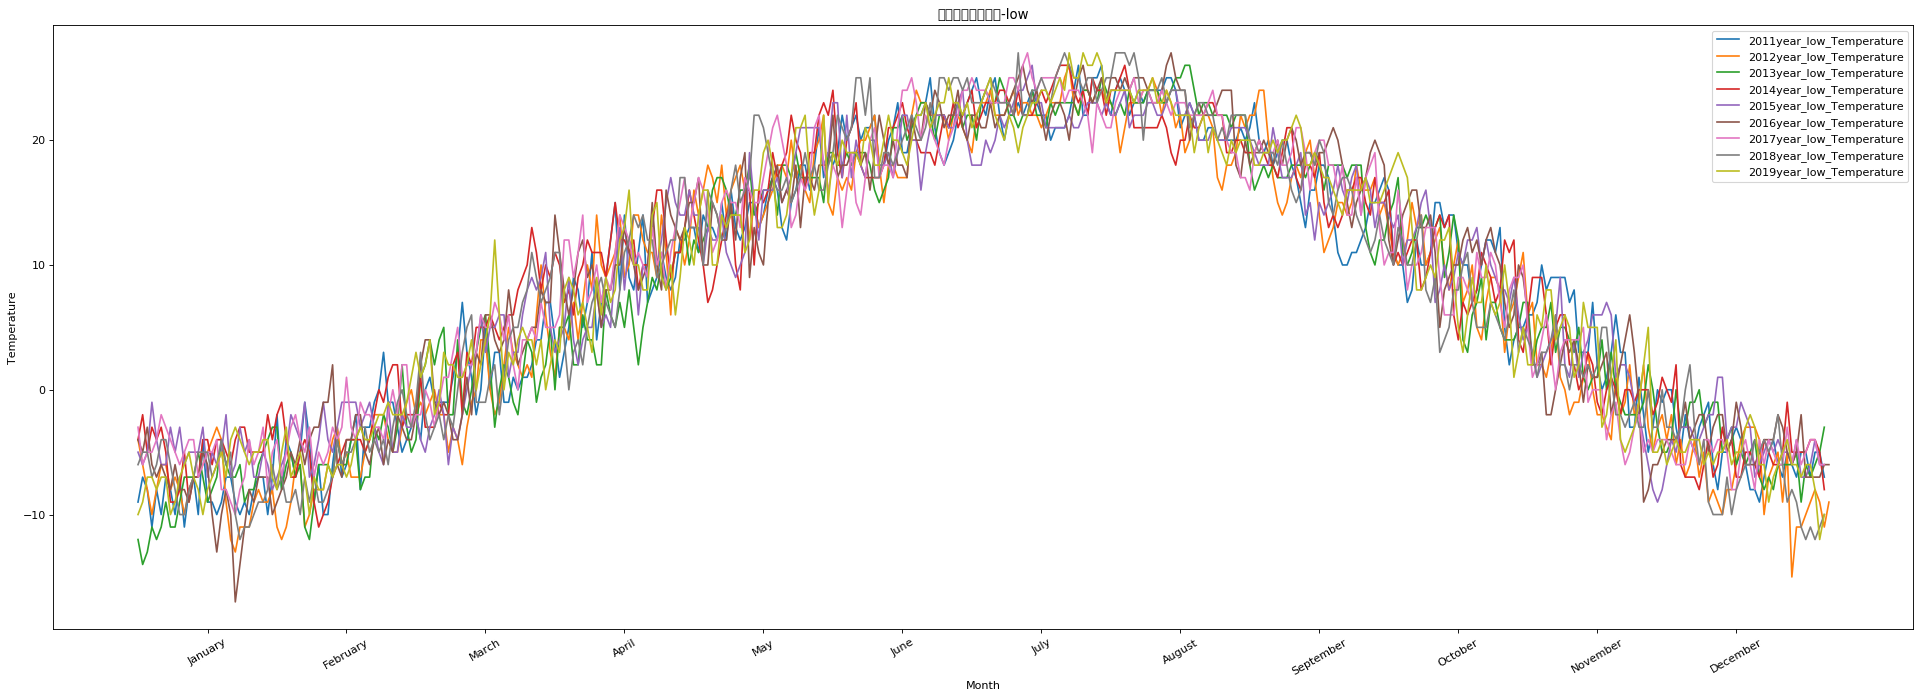

In [9]:
city = input()

file_name = city+"历史天气数据"
city_codes = get_city_coding()  #获取城市代码
city_coding = city_codes[city]  #
for year in range(2011, 2020):
    for month in range(1,13):
        lishi_url = build_url(city_coding, year, month)  #创建历史天气url
        data = parse(lishi_url, city)  #获取数据、处理数据
        save_csv(file_name, data)  #保存数据到csv文件中
drawing_temperature(file_name,0)  #生成最高气温折线图
drawing_temperature(file_name,1)  #生成最低气温折线图

** 整体流程 **

In [ ]:
def crawler_all():
    file = './data/allcity_2019.csv'
    
    city_codings = get_city_coding()
    allcities = list(city_codings.keys())
    
    for city in allcities:
        city_code = city_codings[city]
        for year in range(2019,2012,-1):
            for month in range(1,13):
                url = build_url(city_code, year, month)
                result = parse(url, city_code) # city
                print(f'\r{city} {year}-{month} {len(result)}', end='')
                save_csv(file, result)
                time.sleep(1)

if __name__ == '__main__':
    crawler_all()